<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# hypothesis testing introduction

## 0. python imports

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp

%matplotlib inline

## 1. data loading / generation

t student distribution:
* resilient to small samples
* available when standard deviation is unknown

### t-student distribution example

#### pdf

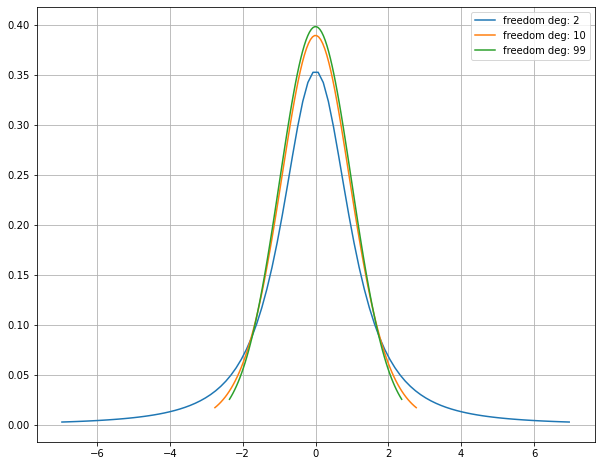

In [83]:
df = [2, 10, 99]
plt.figure(figsize=(10, 8))
for d in df:
    rv = t(df=d, loc=0, scale=1) # random variable
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    y = rv.pdf(x)
    plt.plot(x, y, label=f'freedom deg: {d}')
plt.legend()
plt.grid()
plt.show()

#### cdf

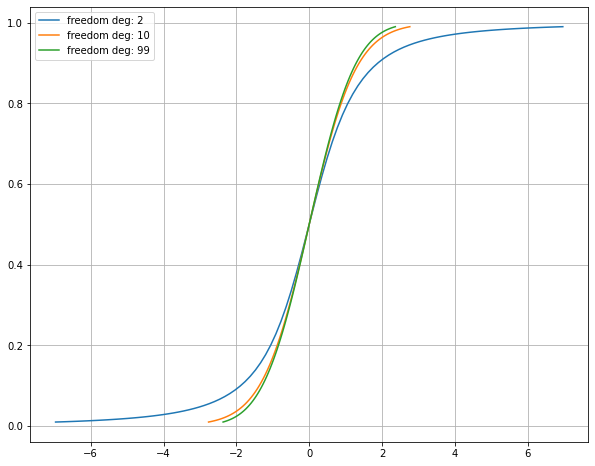

In [84]:
df = [2, 10, 99]
plt.figure(figsize=(10, 8))
for d in df:
    rv = t(df=d, loc=0, scale=1) # random variable
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    y = rv.cdf(x)
    plt.plot(x, y, label=f'freedom deg: {d}')
plt.legend()
plt.grid()
plt.show()

### normal distribution example

#### pdf

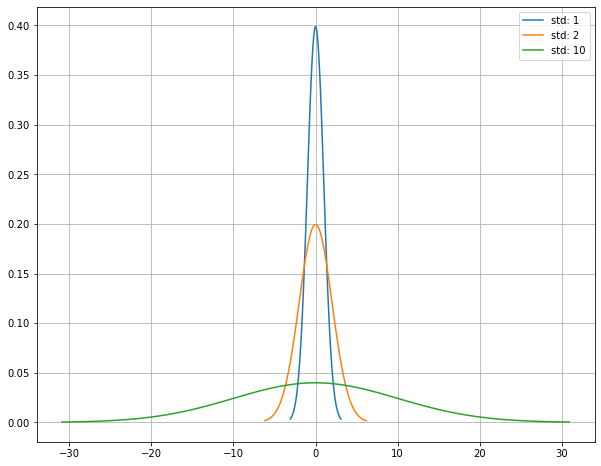

In [85]:
sc = [1, 2, 10]
plt.figure(figsize=(10, 8))
for s in sc:
    rv = norm(scale=s, loc=0) # random variable
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
    y = rv.pdf(x)
    plt.plot(x, y, label=f'std: {s}')
plt.legend()
plt.grid()
plt.show()

#### cdf

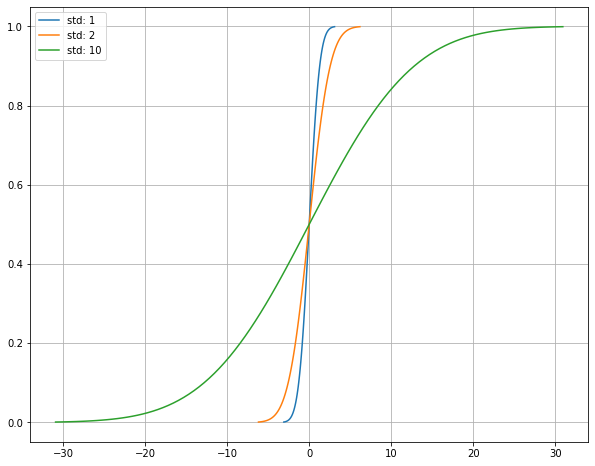

In [86]:
sc = [1, 2, 10]
plt.figure(figsize=(10, 8))
for s in sc:
    rv = norm(scale=s, loc=0) # random variable
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
    y = rv.cdf(x)
    plt.plot(x, y, label=f'std: {s}')
plt.legend()
plt.grid()
plt.show()

### 2. hypothesis test example (handmade)

* explain concept of degrees of freedom in statistics
* hat example
* mean example

hand-made **example 1**, hemoglobin after treatment is less than 5.7, one-sided test, less than:

* 100 subjects
* average is known, 99 degrees of freedom
* t student

In [87]:
mu = 5.7
mu_hat = 5.1
std_hat = 1.6
n = 100

In [88]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test

-3.750000000000003

In [89]:
rv = t(df=n-1)
p_value = rv.cdf(t_test)

In [90]:
p_value

0.0001489332089038242

probability of `mu_hat` being less than 5.7 by chance is 0.0005, much less than 0.05, so null hypothesis is rejected.

hand-made **example 2**: spaniards are taller than 1.70, one-sided test, greater than:

* 100 subjects (99 df)
* sample mean is 1.72
* sample std is 0.2

In [91]:
mu = 1.70
mu_hat = 1.72
std_hat = 0.2
n = 100

In [92]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test

1.0000000000000009

In [93]:
rv = t(df=n-1)
p_value = 1 - rv.cdf(t_test)
p_value

0.15987423706965065

## 3. hypothesis test example (using scipy)

In [94]:
?ttest_1samp

1. hemoglobin after treatment is less than 5.7:

In [95]:
patients = np.random.normal(5.1, 1.6, 100)
test_results = ttest_1samp(patients, 5.7)
display(test_results.statistic)
display(test_results.pvalue / 2)

-4.243091304345742

2.485128200823223e-05

2. spaniards are taller than 1.7:

In [96]:
spaniards = np.random.normal(1.72, 0.2, 100)
test_results = ttest_1samp(spaniards, 1.70)
display(test_results.statistic)
display(test_results.pvalue / 2)

1.0864679762080014

0.13995515034141373

**if there is enough time, make Renfe test with price of Madrid - Sevilla tickets**

In [97]:
renfe = pd.read_csv('../week_07/dataframe_calculations_and_big_data_tools/data/renfe_sample.csv')

In [98]:
renfe

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,price_tree,batch,id
0,4569288,2019-04-18 13:47:08,MADRID,BARCELONA,2019-04-19 11:30:00,2019-04-19 14:40:00,AVE,107.70,Turista,Flexible,NaN,NaN,NaN
1,22860054,2020-03-18 20:42:00,BARCELONA,MADRID,2020-05-29 18:00:00,2020-05-29 21:10:00,AVE,NaN,NaN,NaN,{},2020-03-18 18:15:00,12103742.0
2,5687485,2019-04-29 21:08:10,MADRID,PONFERRADA,2019-05-20 12:20:00,2019-05-20 18:52:00,LD-MD,34.35,Turista con enlace,Promo +,NaN,NaN,NaN
3,13856339,2020-02-22 02:04:41,MADRID,PALENCIA,2020-04-11 08:00:00,2020-04-11 10:37:00,LD-MD,38.90,Turista con enlace,Flexible,"{""Turista con enlace"": {""Flexible"": {""price"": ...",2020-02-22 00:00:00,3110678.0
4,19660069,2020-03-08 21:05:07,GIRONA,MADRID,2020-05-30 08:11:00,2020-05-30 13:10:00,AVANT-AVE,78.20,Turista con enlace,Promo,"{""Turista con enlace"": {""Promo"": {""price"": 78....",2020-03-08 17:00:00,8871715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7495256,2019-05-24 03:29:55,SEVILLA,MADRID,2019-07-18 20:15:00,2019-07-18 22:36:00,AVE,NaN,Preferente,Promo,NaN,NaN,NaN
99996,8684774,2020-04-02 20:05:11,LEON,MADRID,2020-04-29 06:40:00,2020-04-29 11:26:00,MD,NaN,NaN,NaN,{},2020-04-02 18:00:00,17356187.0
99997,11667284,2020-02-04 23:06:24,VALENCIA,MADRID,2020-03-18 09:50:00,2020-03-18 17:28:00,REGIONAL,28.35,Turista,Adulto ida,"{""Turista"": {""Adulto ida"": 28.35}}",NaN,921623.0
99998,3288515,2019-06-22 15:00:29,VALENCIA,MADRID,2019-06-29 14:50:00,2019-06-29 22:17:00,REGIONAL,28.35,Turista,Adulto ida,NaN,NaN,NaN


<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>